# Introdução

**Contextualização:** Estes datasets permitem estudar e analisar fatores que afetam a saúde mental, nomeadamente o stress e a depressão, em dois contextos distintos: estudantes e comunidades rurais. No primeiro caso, é possível identificar os principais fatores que contribuem para o stress académico e social dos estudantes, facilitando a implementação de estratégias para melhorar o seu bem-estar. No segundo caso, os dados da Busara Center permitem prever a prevalência de depressão em áreas rurais do Quénia, promovendo intervenções mais eficazes para populações vulneráveis.

**Objectivo**:

# Análise Exploratória de Dados

## Fonte do Dataset

We did a survey after visiting schools and colleges to make them aware of the importance of Mental Health for a student, at the same time. [(Acharya, 2022)](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data)

- Author: Chhabi Acharya
- Date: Jun. 2022 to Oct.2022
- Age group: 15 to 24
- City: Dharan, Nepal
- University: Tribhuvan University.

## Explicação das Colunas:
- **Anxiety**: range from 0 to 21, Measure : GAD-7
- **Self-esteem**: range 0 to 30, Measure: Rosenberg Self Esteem Scale
- **Mental Health History**: 0 if no mental health history, 1 if mental health history
- **Depression**: range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
- Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.

In [19]:
import pandas as pd

STUDENT_STRESS: str = "/content/drive/MyDrive/DEPRESSION_DETECTION_MODEL/student_stress_factors.csv"

df = pd.read_csv(STUDENT_STRESS)
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [20]:
pd.set_option('display.max_columns', None)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


## Estudo do dataset

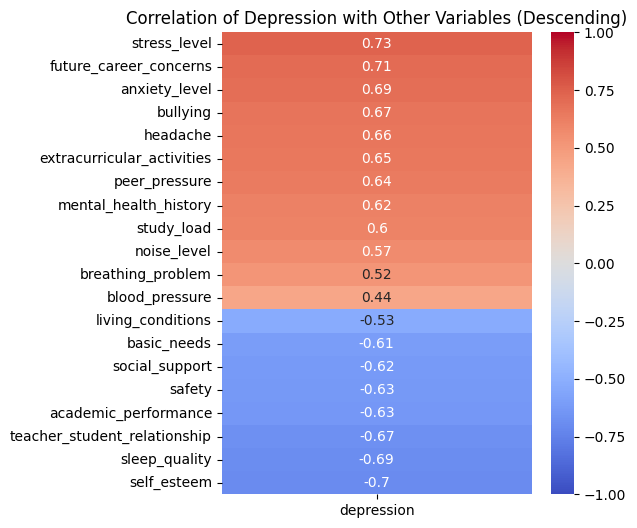

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()[['depression']].drop('depression')
corr_matrix_sorted = corr_matrix.sort_values(by='depression', ascending=False)

plt.figure(figsize=(5, 6))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation of Depression with Other Variables (Descending)')
plt.show()

# Treinamento o Modelo

## Modelo Completo

In [22]:
# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('depression', axis=1)
y = df['depression']

RANDOM_STATE: int = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

xgradient_boost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE)
xgradient_boost_model.fit(X_train, y_train)

multilayer_perceptron_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=RANDOM_STATE)
multilayer_perceptron_model.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=42)

## Avaliando o Modelo Completo

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report


def evaluate_models(models, model_names, X_test, y_test):
    results = []

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Model': name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        })
    results_df = pd.DataFrame(results)

    return results_df


models = [linear_regression_model, xgradient_boost_model, multilayer_perceptron_model]
model_names = ['Linear Regression', 'XGBoost', 'Multilayer Perceptron']

evaluate_models(models, model_names, X_test, y_test)

,Model,MSE,RMSE,MAE,R²
0,Linear Regression,27.510069,5.245004,3.804202,0.576730
1,XGBoost,27.213576,5.216663,3.752783,0.581292
2,Multilayer Perceptron,32.186072,5.673277,3.812385,0.504785


## Modelo Simplificado

## Correlação das colunas com *depression*

['stress_level', 'future_career_concerns', 'self_esteem', 'anxiety_level', 'sleep_quality', 'teacher_student_relationship', 'bullying', 'headache', 'extracurricular_activities', 'peer_pressure']


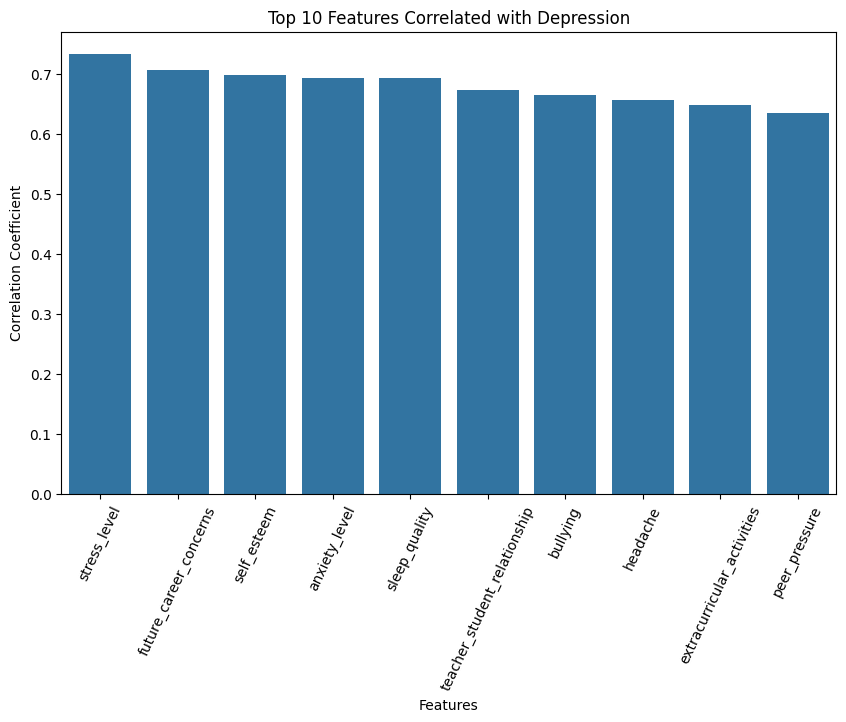

In [24]:
corr_matrix = df.corr()

depression_corr = corr_matrix['depression'].abs().sort_values(ascending=False)

top_features = depression_corr.head(11).index.tolist()
top_features.remove('depression')

print(top_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=depression_corr[top_features])
plt.title('Top 10 Features Correlated with Depression')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=65)
plt.show()

## Importância de cada coluna

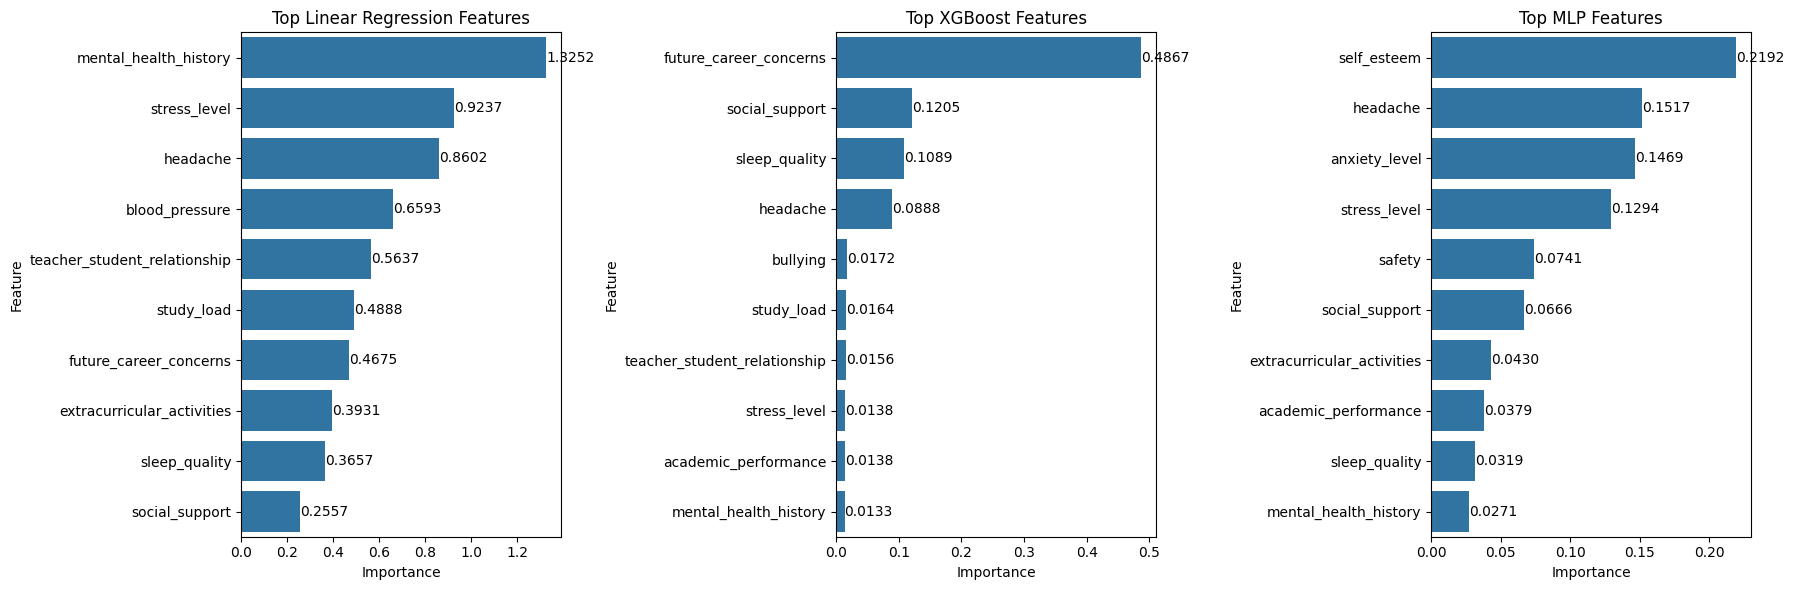

In [25]:
# from sklearn.inspection import permutation_importance

# def get_top_importance(importances, feature_names, feature_num: int = 10):
#     feature_importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': importances
#     }).sort_values(by='Importance', ascending=False)

#     # Get the top 5 features
#     return feature_importance_df.head(feature_num)


# feature_names = X.columns

# linear_importance = np.abs(linear_regression_model.coef_)
# top_linear = get_top_importance(linear_importance, feature_names)

# xgboost_importance = xgradient_boost_model.feature_importances_
# top_xgboost = get_top_importance(xgboost_importance, feature_names)

# mlp_importance_result = permutation_importance(multilayer_perceptron_model, X_test, y_test, n_repeats=10, random_state=42)
# mlp_importance = mlp_importance_result.importances_mean
# top_mlp = get_top_importance(mlp_importance, feature_names)



# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# sns.barplot(x='Importance', y='Feature', data=top_linear, ax=axes[0])
# axes[0].set_title('Top Linear Regression Features')

# sns.barplot(x='Importance', y='Feature', data=top_xgboost, ax=axes[1])
# axes[1].set_title('Top XGBoost Features')

# sns.barplot(x='Importance', y='Feature', data=top_mlp, ax=axes[2])
# axes[2].set_title('Top MLP Features')

# plt.tight_layout()
# plt.show()
from sklearn.inspection import permutation_importance

def get_top_importance(importances, feature_names, feature_num: int = 10):
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Get the top 5 features
    return feature_importance_df.head(feature_num)


feature_names = X.columns

linear_importance = np.abs(linear_regression_model.coef_)
top_linear = get_top_importance(linear_importance, feature_names)

xgboost_importance = xgradient_boost_model.feature_importances_
top_xgboost = get_top_importance(xgboost_importance, feature_names)

mlp_importance_result = permutation_importance(multilayer_perceptron_model, X_test, y_test, n_repeats=10, random_state=42)
mlp_importance = mlp_importance_result.importances_mean
top_mlp = get_top_importance(mlp_importance, feature_names)



fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Importance', y='Feature', data=top_linear, ax=axes[0])
axes[0].set_title('Top Linear Regression Features')
for index, value in enumerate(top_linear['Importance']):
    axes[0].text(value, index, f'{value:.4f}', va='center')

sns.barplot(x='Importance', y='Feature', data=top_xgboost, ax=axes[1])
axes[1].set_title('Top XGBoost Features')
for index, value in enumerate(top_xgboost['Importance']):
    axes[1].text(value, index, f'{value:.4f}', va='center')

sns.barplot(x='Importance', y='Feature', data=top_mlp, ax=axes[2])
axes[2].set_title('Top MLP Features')
for index, value in enumerate(top_mlp['Importance']):
    axes[2].text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()

## Dataset Simplificado

Foram selecionadas parte das features mais importantes para o modelo XGBoost
para fazer parte do dataset simplificado.

In [26]:
selected_columns = [
        'depression',
        'future_career_concerns',
        'study_load',
        'teacher_student_relationship',
        'sleep_quality',
        'academic_performance',
        'stress_level',
    ]

simplified_dataframe = df[selected_columns]

simplified_dataframe.head()
simplified_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   depression                    1100 non-null   int64
 1   future_career_concerns        1100 non-null   int64
 2   study_load                    1100 non-null   int64
 3   teacher_student_relationship  1100 non-null   int64
 4   sleep_quality                 1100 non-null   int64
 5   academic_performance          1100 non-null   int64
 6   stress_level                  1100 non-null   int64
dtypes: int64(7)
memory usage: 60.3 KB


## Treinamento do Modelo Simplificado

In [27]:
simple_X = simplified_dataframe.drop('depression', axis=1)
simple_y = simplified_dataframe['depression']

simple_X_train, simple_X_test, simple_y_train, simple_y_test = train_test_split(simple_X, simple_y, test_size=0.2, random_state=RANDOM_STATE)

slinear_regression_model = LinearRegression()
slinear_regression_model.fit(simple_X_train, simple_y_train)

sxgradient_boost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE)
sxgradient_boost_model.fit(simple_X_train, simple_y_train)

smultilayer_perceptron_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=RANDOM_STATE)
smultilayer_perceptron_model.fit(simple_X_train, simple_y_train)

MLPRegressor(max_iter=1000, random_state=42)

## Avaliando o Modelo Simplificado

In [28]:
smodels = [slinear_regression_model, sxgradient_boost_model, smultilayer_perceptron_model]
smodel_names = ['Simple - Linear Regression', 'Simple - XGBoost', 'Simple - Multilayer Perceptron']

evaluate_models(smodels, smodel_names, simple_X_test, simple_y_test)

,Model,MSE,RMSE,MAE,R²
0,Simple - Linear Regression,24.984064,4.998406,3.607628,0.615595
1,Simple - XGBoost,23.076742,4.803826,3.411471,0.644941
2,Simple - Multilayer Perceptron,27.087774,5.204592,3.664605,0.583227


In [29]:
evaluate_models(models, model_names, X_test, y_test)

,Model,MSE,RMSE,MAE,R²
0,Linear Regression,27.510069,5.245004,3.804202,0.576730
1,XGBoost,27.213576,5.216663,3.752783,0.581292
2,Multilayer Perceptron,32.186072,5.673277,3.812385,0.504785


# Guardando os Modelos

In [30]:
import pickle

def save_model(model, filename: str):
    with open(f'{filename}.pkl', 'wb') as file:
        pickle.dump(model, file)

save_model(linear_regression_model, 'linear_regression_model')
save_model(xgradient_boost_model, 'xgradient_boost_model')
save_model(multilayer_perceptron_model, 'multilayer_perceptron_model')

save_model(slinear_regression_model, 'slinear_regression_model')
save_model(sxgradient_boost_model, 'sxgradient_boost_model')
save_model(smultilayer_perceptron_model, 'smultilayer_perceptron_model')

# Previsões

In [31]:
def load_model(filename: str):
    try:
        with open(f'{filename}.pkl', 'rb') as file:
            return pickle.load(file)
    except FileNotFoundError:
        print(f"Model file '{filename}.pkl' not found.")

input_data = {
    'anxiety_level': [5],
    'self_esteem': [15],
    'mental_health_history': [1],
    'headache': [0],
    'blood_pressure': [2],
    'sleep_quality': [4],
    'breathing_problem': [1],
    'noise_level': [3],
    'living_conditions': [2],
    'safety': [4],
    'basic_needs': [5],
    'academic_performance': [3],
    'study_load': [2],
    'teacher_student_relationship': [5],
    'future_career_concerns': [2],
    'social_support': [3],
    'peer_pressure': [1],
    'extracurricular_activities': [0],
    'bullying': [1],
    'stress_level': [4],
}
input_df = pd.DataFrame(input_data)

simple_input_data = {
    'future_career_concerns': [2],
    'study_load': [2],
    'teacher_student_relationship': [5],
    'sleep_quality': [4],
    'academic_performance': [3],
    'stress_level': [4],
}
simple_input_df = pd.DataFrame(simple_input_data)

predicted_depression = load_model('xgradient_boost_model').predict(input_df)
simple_predicted_depression = load_model('sxgradient_boost_model').predict(simple_input_df)


print(f"Predicted Depression Value: {predicted_depression[0]}")
print(f"S Predicted Depression Value: {simple_predicted_depression[0]}")

Predicted Depression Value: 17.156522750854492
S Predicted Depression Value: 15.061386108398438
